In [1]:
import os

import functools
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
import multiprocessing as mp
import numpy as np

from generation.config import DATA_DIR as BASE_DIR
from generation.data.data_preparation import get_attributes_df, \
                                             get_detector_event_df, \
                                             generate_one_signal, \
                                             postprocess_signal

In [26]:
def normalize(signal):
    return signal / np.max(signal)


def get_detectors_signals(df_full, event):
    detectors = range(9)
    df_event = get_detector_event_df(df_full, event=event)
    detectors_df = [get_detector_event_df(df_event, detector=detector) for detector in detectors]
    detectors_signal = [generate_one_signal(detector_df, sample_coef=1.0) for detector_df in detectors_df]
    normalized_detectors_signals = [normalize(signal) for signal in detectors_signal]
    
    return normalized_detectors_signals

In [3]:
df_full = get_attributes_df()
events = df_full['event'].unique() 

In [6]:
res_dir = os.path.join(BASE_DIR, 'shape_analysis')

# for event in tqdm.tqdm(events):
#     event_signals = np.array(get_detectors_signals(df_full, event=event))
#     np.save(f'{res_dir}/{event}.0.npy', event_signals)

In [167]:
def plot_detectors_signal(event):
    event_signals = np.load(f'{res_dir}/{event}.npy')
    f, ax = plt.subplots(3, 3, figsize=(12, 12))
    for detector in range(len(event_signals)):
        ax[detector // 3][detector % 3].plot(event_signals[detector])
    plt.show()

Event: 36.0


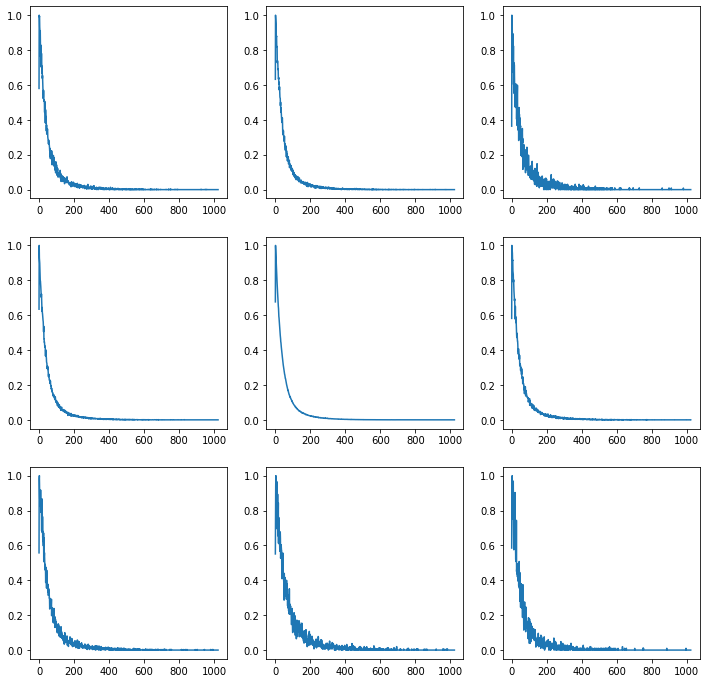

In [173]:
event = np.random.choice(events)
print(f"Event: {event}")
plot_detectors_signal(event)

Event: 14.0


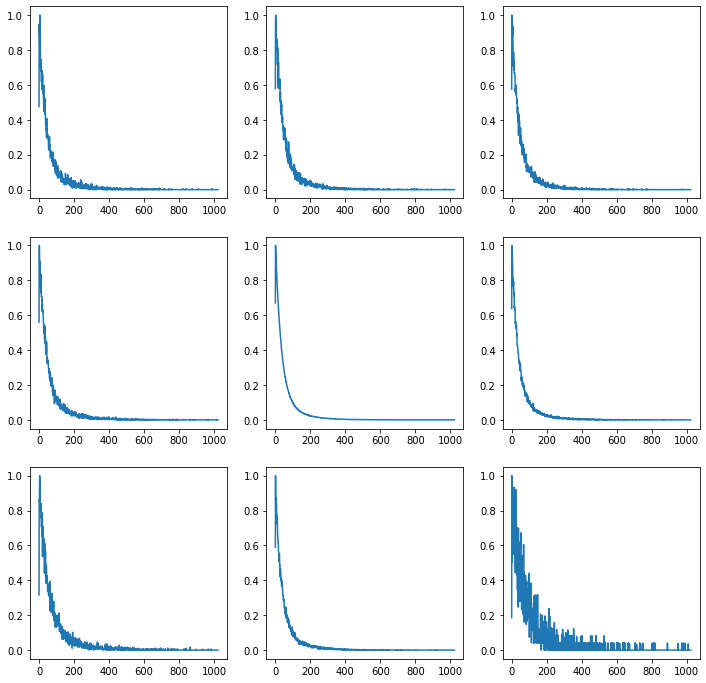

In [178]:
event = np.random.choice(events)
print(f"Event: {event}")
plot_detectors_signal(event)